**House Price Prdiction**

**Step 1 :Import Package**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

**Step 2:Import Datset**

In [2]:
data=pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Step 3:Feature Selection**

In [5]:
x=data[['bedrooms','bathrooms','floors','waterfront','condition','grade']]
y=data[['price']]

In [6]:
print(x)

       bedrooms  bathrooms  floors  waterfront  condition  grade
0             3       1.00     1.0           0          3      7
1             3       2.25     2.0           0          3      7
2             2       1.00     1.0           0          3      6
3             4       3.00     1.0           0          5      7
4             3       2.00     1.0           0          3      8
...         ...        ...     ...         ...        ...    ...
21608         3       2.50     3.0           0          3      8
21609         4       2.50     2.0           0          3      8
21610         2       0.75     2.0           0          3      7
21611         3       2.50     2.0           0          3      8
21612         2       0.75     2.0           0          3      7

[21613 rows x 6 columns]


In [7]:
print(y)

          price
0      221900.0
1      538000.0
2      180000.0
3      604000.0
4      510000.0
...         ...
21608  360000.0
21609  400000.0
21610  402101.0
21611  400000.0
21612  325000.0

[21613 rows x 1 columns]


**Step 4: Split the data**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.10,random_state =2)

**Step 5: Train the Model**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(x_train,y_train)

LinearRegression()

In [13]:
model.score(x_test,y_test)

0.5658004577005149

**Step 6: Predict and Evalute**

In [14]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 63447565233.093285


In [15]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

print(f"R-Squared: {r2}")

R-Squared: 0.5658004577005149


**Step 7: Plotting the Result**

In [16]:
import matplotlib.pyplot as plt

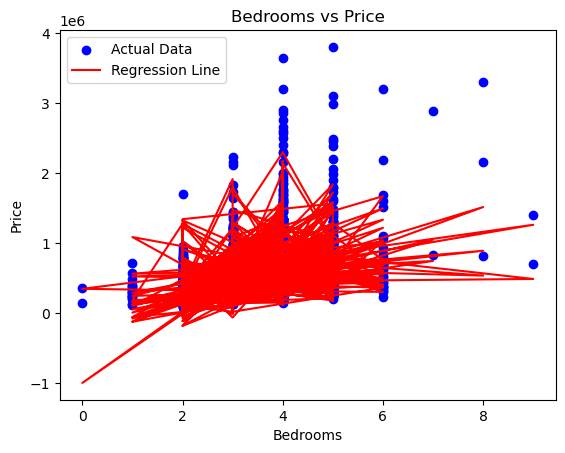

In [17]:
plt.scatter(x_test['bedrooms'], y_test, color='blue', label='Actual Data')
plt.plot(x_test['bedrooms'], y_pred, color='red', label='Regression Line')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.legend()
plt.show()

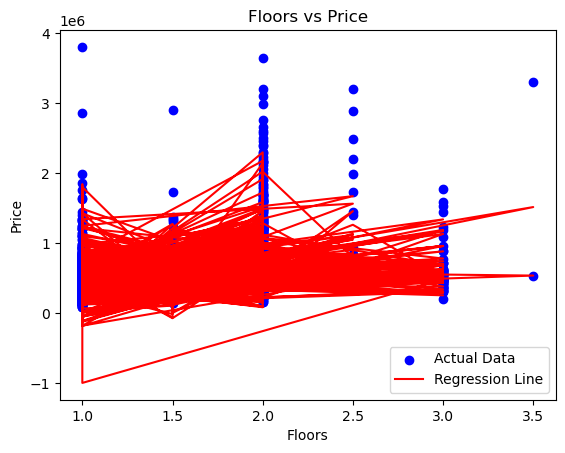

In [25]:
plt.scatter(x_test['floors'], y_test, color='blue', label='Actual Data')
plt.plot(x_test['floors'], y_pred, color='red', label='Regression Line')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.title('Floors vs Price')
plt.legend()
plt.show()

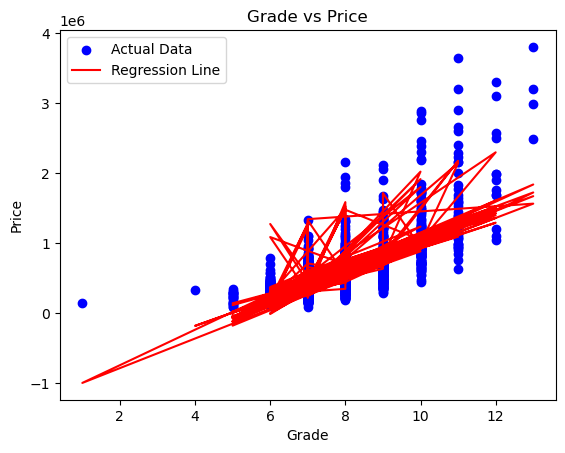

In [29]:
plt.scatter(x_test[['grade']], y_test, color='blue', label='Actual Data')
plt.plot(x_test['grade'], y_pred, color='red', label='Regression Line')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Grade vs Price')
plt.legend()
plt.show()